In [ ]:
# image_classification using scikit learn

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import reshape_as_image
from rasterio.plot import show
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


In [24]:
def realce(img, percent_i=2, percent_f=98, x=0 , y=1):
    
    w = np.percentile(img, percent_i)
    z = np.percentile(img, percent_f)
    
            
    # Calcular a expansão
    s = np.clip(x + (img - w) * (y - x) / (z - w), x, y)
    
    return s

In [3]:
#importação da imagem e das amostras em formato raster

image_path = "G:/Meu Drive/INPE/projeto_dissertacao/imagem_testes_rec.TIF"
samples_path = "G:/Meu Drive/INPE/projeto_dissertacao/amostras.TIF"

In [4]:
with rio.open(image_path) as src:
    image = src.read()
    affine = src.transform  
    profile = src.profile

In [97]:
with rio.open(samples_path) as src2:
    samples = src2.read(1)
    affine2 = src2.transform  
    profile2 = src2.profile

In [20]:
#conferindo se as imagens tem as mesmas dimensões
if image.shape[1:3] == samples.shape[1:3]:
    print('A imagem e as amostras possuem a mesma quantidade de linhas e colunas')

In [98]:
img_bands, img_rows, img_cols = image.shape
spl_rows, spl_cols = samples.shape

In [88]:
band_names = ['BLUE','GREEN', 'RED', 'NIR', 'SWIR1','SWIR2']

In [96]:
# imagem como um objeto 2d
I = pd.DataFrame(image.reshape(img_bands,img_rows*img_cols).T)
I.columns = band_names
I

,BLUE,GREEN,RED,NIR,SWIR1,SWIR2
0,7775.0,8086.0,7823.0,7637.0,7305.0,7349.0
1,7776.0,8244.0,7823.0,7481.0,7409.0,7201.0
2,7776.0,8559.0,7823.0,7638.0,7305.0,7350.0
3,8008.0,8559.0,7824.0,7793.0,7305.0,7053.0
4,8163.0,8401.0,7951.0,7793.0,7305.0,7498.0
...,...,...,...,...,...,...
1236031,7690.0,8646.0,7905.0,17863.0,12571.0,8975.0
1236032,7915.0,8799.0,8277.0,19817.0,13495.0,9857.0
1236033,8214.0,9259.0,8649.0,21167.0,14420.0,10004.0
1236034,8214.0,8952.0,8649.0,20868.0,13701.0,9710.0


In [100]:
#Selecionando a posição da amostras no espaço da imagem
sample_selection = image[:,samples>0]
y = samples[samples>0]

In [103]:
n_bands, n_pixels = sample_selection.shape
X = pd.DataFrame(sample_selection.reshape(n_bands, n_pixels).T)
X.columns = band_names
X

,BLUE,GREEN,RED,NIR,SWIR1,SWIR2
0,8090.0,8298.0,7993.0,16695.0,12170.0,9273.0
1,8014.0,8298.0,8117.0,16997.0,12479.0,9125.0
2,8014.0,8453.0,7993.0,17908.0,12583.0,9419.0
3,8014.0,8453.0,8117.0,17605.0,12686.0,9419.0
4,7939.0,8609.0,8117.0,17301.0,12788.0,9419.0
...,...,...,...,...,...,...
38545,7788.0,8506.0,8038.0,16831.0,11862.0,8833.0
38546,7863.0,8506.0,8163.0,17586.0,12069.0,8833.0
38547,7938.0,8506.0,8287.0,17284.0,12275.0,8980.0
38548,7938.0,8505.0,8287.0,17584.0,12273.0,9274.0


In [104]:
# Dividindo X em conjunto de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(),
                                                    test_size = 0.3)

In [105]:
#CLASSIFICAÇÃO

# Criando um objeto para o RF
rf =RandomForestRegressor(random_state=42)

# Rodando o modelo nos dados de treino
rf.fit(X_train, y_train)
     

RandomForestRegressor(random_state=42)

In [106]:
# Realizando predição e extraindo métricas
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}, R2: {r2}')

Mean Squared Error: 0.003031699092088197, R2: 0.9961383338872872


In [107]:
# Rodando predição em toda imagem
pred_rf = rf.predict(I)

In [109]:
# Retornando para o formato original
pred_rf_final = pred_rf.reshape(img_rows,img_cols)

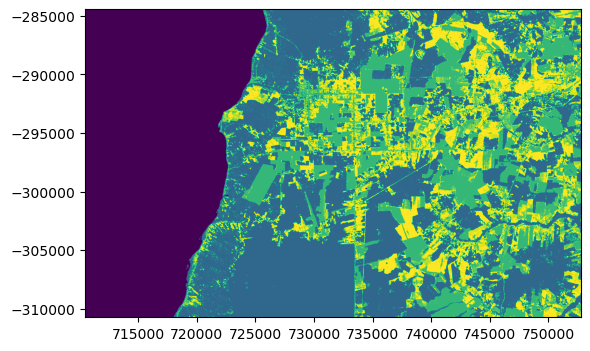

<Axes: >

In [110]:
# Visualizando
show(pred_rf_final, transform=affine, adjust=True)